# Niloufar Baba Ahmadi 610398103 HW3

Mount Google Drive to access files

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Imports

In [2]:
import cv2
import os
import numpy as np
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import pickle
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

### Data Augmentation and Dataset Separation

This piece of code performs image data augmentation and dataset separation into training and test sets.

1. Image Processing:
   - A list, `image_paths`, is initialized to store the paths of the processed images.
   - For each file in the dataset directory:
     - If the file ends with the extension ".tif":
       - The image is loaded using OpenCV and stored in `img`.
       - If the image has more than two dimensions, it is converted to grayscale.
       - The image is horizontally flipped, and the flipped image is saved with a filename prefix of "aug_horiz_".
       - The flipped image's path is appended to `image_paths`.
       - Histogram equalization is applied to the original image, and the result is saved with a filename prefix of "aug_eqhist_".
       - The equalized image's path is appended to `image_paths`.
       - The image is rotated 90 degrees clockwise, and the rotated image is saved with a filename prefix of "aug_rot90_".
       - The rotated image's path is appended to `image_paths`.
       - The image is translated using a predefined translation matrix, and the translated image is saved with a filename prefix of "aug_trans_".
       - The translated image's path is appended to `image_paths`.
       - The image is sheared using a predefined shearing matrix, and the sheared image is saved with a filename prefix of "aug_shear_".
       - The sheared image's path is appended to `image_paths`.

2. Counting:
   - The total number of color images is counted by iterating through `image_paths` and checking if each image has more than two dimensions.
   - The count of color images is printed.

3. Dataset Separation:
   - The `train_test_split` function is used to split `image_paths` into training and test sets with a test size of 0.2 and a random state of 42.



In [1]:
# Path to dataset
dataset_path = '/content/drive/MyDrive/image processing/dataset/dataset'

# A new directory to store augmented images
augmented_path = '/content/drive/MyDrive/image processing/augmented images'
os.makedirs(augmented_path, exist_ok=True)

# Lists to store image paths
image_paths = []

# Iterating through the images in the dataset
for filename in os.listdir(dataset_path):
    if filename.endswith('.tif'):
        img_path = os.path.join(dataset_path, filename)
        image_paths.append(img_path)

        # Loading the image
        img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)

        # Converting the image to grayscale
        if img.ndim > 2:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Flip the image horizontally
        flipped_img = cv2.flip(img, 1)
        augmented_filename = 'aug_horiz_' + filename
        augmented_filepath = os.path.join(augmented_path, augmented_filename)
        cv2.imwrite(augmented_filepath, flipped_img)
        image_paths.append(augmented_filepath)

        # Apply histogram equalization
        equalized_img = cv2.equalizeHist(img)
        augmented_filename = 'aug_eqhist_' + filename
        augmented_filepath = os.path.join(augmented_path, augmented_filename)
        cv2.imwrite(augmented_filepath, equalized_img)
        image_paths.append(augmented_filepath)

        # Rotate the image by 90 degrees
        rotated_img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
        augmented_filename = 'aug_rot90_' + filename
        augmented_filepath = os.path.join(augmented_path, augmented_filename)
        cv2.imwrite(augmented_filepath, rotated_img)
        image_paths.append(augmented_filepath)

        # Translate the image
        M = np.float32([[1, 0, 50], [0, 1, 50]])  # Translation matrix
        translated_img = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
        augmented_filename = 'aug_trans_' + filename
        augmented_filepath = os.path.join(augmented_path, augmented_filename)
        cv2.imwrite(augmented_filepath, translated_img)
        image_paths.append(augmented_filepath)

        # Shear the image
        M = np.float32([[1, 0.2, 0], [0.2, 1, 0]])  # Shearing matrix
        sheared_img = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
        augmented_filename = 'aug_shear_' + filename
        augmented_filepath = os.path.join(augmented_path, augmented_filename)
        cv2.imwrite(augmented_filepath, sheared_img)
        image_paths.append(augmented_filepath)

print("Data augmentation is complete!")

# Counting the total number of color images
total_color_images = sum(1 for path in image_paths if cv2.imread(path).ndim > 2)
print("Total color images after data augmentation:", total_color_images)

# Split the dataset into training and test sets
train_paths, test_paths = train_test_split(image_paths, test_size=0.2, random_state=42)

# Creating directories for the training and test sets
train_path = '/content/drive/MyDrive/image processing/train set'
test_path = '/content/drive/MyDrive/image processing/test set'
os.makedirs(train_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

# Copy the training images to the train dataset folder
for path in train_paths:
    filename = os.path.basename(path)
    destination_path = os.path.join(train_path, filename)
    shutil.copy2(path, destination_path)

# Copy the test images to the test dataset folder
for path in test_paths:
    filename = os.path.basename(path)
    destination_path = os.path.join(test_path, filename)
    shutil.copy2(path, destination_path)

print("Data separation is complete!")

Mounted at /content/drive
Data augmentation is complete!
Total color images after data augmentation: 1560
Data separation is complete!


#### The original image and the augmented ones

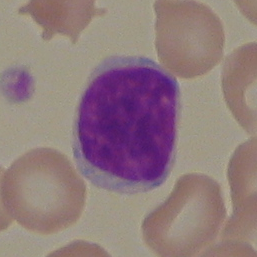

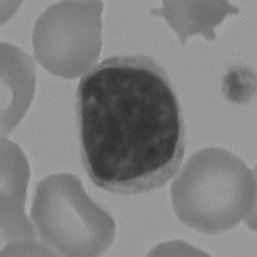

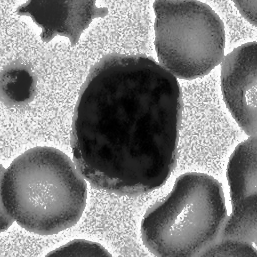

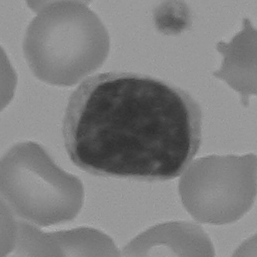

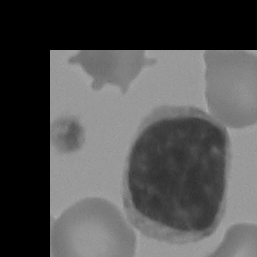

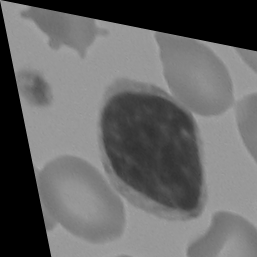

In [2]:
from google.colab.patches import cv2_imshow

original_image_path = '/content/drive/MyDrive/image processing/dataset/dataset/Im259_0.tif'
original_image = cv2.imread(original_image_path, cv2.IMREAD_UNCHANGED)
augmented_images_path = '/content/drive/MyDrive/image processing/augmented images'

# Iterating through the augmented images
for filename in os.listdir(augmented_images_path):
    if filename.startswith('aug_') and filename.endswith('Im259_0.tif'):
        augmented_image_path = os.path.join(augmented_images_path, filename)

        # Load and display each augmented image
        augmented_image = cv2.imread(augmented_image_path, cv2.IMREAD_UNCHANGED)
        if augmented_image is None:
            print(f"Failed to load the augmented image from '{augmented_image_path}'. Please check the file path and format.")
        else:
            cv2_imshow(augmented_image)


### The given model architecture

This piece of code creates a sequential model using the Keras library.

Specifically, the model architecture is as follows:

1. Convolutional Layers:
   - The model includes five convolutional layers with different configurations.
   - Each convolutional layer uses a 3x3 filter size and ReLU activation.
   - The number of filters is set to 48 for all convolutional layers.
   - The padding is set to 'same' for all convolutional layers.
   - The input shape of the first convolutional layer is (257, 257, 3).

2. Max Pooling:
   - Some of the convolutional layers are followed by max pooling layers.
   - The max pooling layers use a 2x2 pool size and a stride of 2.

3. Flattening:
   - After the convolutional layers, the tensor output is flattened.

4. Fully Connected Layer:
   - A fully connected layer with 1000 units and ReLU activation is added.

5. Dropout Layer:
   - A dropout layer with a rate of 0.5 is added to prevent overfitting.

6. Output Layer:
   - An output layer with 2 units and softmax activation is added.


In [2]:
model = Sequential()

# Layer parameters
FS = (3, 3)  # Filter size
MP_size = (2, 2)  # Max-pooling size
NoF = 48  # Number of filters
P = 'same'  # Padding
activation = 'relu'  # Activation function

# Convolutional layers
layer_configs = [(2, 2, 2), (1, 1, 2), (5, 1, 1), (3, 1, 1), (3, 3, 1)]
for i, (s, strides, pooling) in enumerate(layer_configs, start=1):
    model.add(Conv2D(NoF, FS, strides=strides, padding=P, activation=activation, input_shape=(257, 257, 3)))
    if pooling:
        model.add(MaxPooling2D(pool_size=MP_size, strides=2))

# Flatten the tensor output
model.add(Flatten())

# Add a Fully Connected layer
model.add(Dense(1000, activation='relu'))
# Add a Dropout layer
model.add(Dropout(0.5))

# Add an output layer
model.add(Dense(2, activation='softmax'))

# Model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 129, 129, 48)      1344      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 48)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 48)        20784     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 48)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 48)        20784     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 48)       0

### Training Phase

1. The image size is set to (257, 257).
2. Lists are initialized to store the training and test data and labels.
3. The get_label function is defined to extract labels from filenames.
4. The pixel values of the images are normalized to the range [0, 1].
5. The labels are converted to one-hot encoded format.
6. The model is compiled using a binary cross-entropy loss function, Adam optimizer with a learning rate of 0.0001, and accuracy as the metric.
7. Early stopping is defined with a patience of 20 epochs and restores the best weights.
8. The model is trained using the training data, with a batch size of 100 and a maximum of 500 epochs. The validation data is provided to monitor performance and apply early stopping.
9. The model is evaluated on the test data, and the test loss and accuracy are printed.
10. The model's training history is saved to a file using pickle.

In [3]:
train_path = '/content/drive/MyDrive/image processing/train set'
test_path = '/content/drive/MyDrive/image processing/test set'

# The image size
image_size = (257, 257)

# Prepare data
X_train = []  # List to store the training image data
y_train = []  # List to store the corresponding training labels

X_test = []  # List to store the test image data
y_test = []  # List to store the corresponding test labels

# Defining the get_label function according to the data explanation
def get_label(filename):
    label = int(filename.split('_')[-1].split('.')[0].split()[0])
    return label

# Read the images from the train dataset folder and resize them
for filename in os.listdir(train_path):
    filepath = os.path.join(train_path, filename)
    img = cv2.imread(filepath)
    img = cv2.resize(img, image_size)  # Resize the image
    X_train.append(img)
    y_train.append(get_label(filename))

# Read the images from the test dataset folder and resize them
for filename in os.listdir(test_path):
    filepath = os.path.join(test_path, filename)
    img = cv2.imread(filepath)
    img = cv2.resize(img, image_size)  # Resize the image
    X_test.append(img)
    y_test.append(get_label(filename))

# Convert the lists to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Normalize the pixel values to the range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoded format
num_classes = 2
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [3]:
# Compile the model
learning_rate = 0.0001
loss_function = BinaryCrossentropy()
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Training the model with early stopping
batch_size = 100
epochs = 500
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluating on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

with open('/content/drive/MyDrive/image processing/history.pickle', 'wb') as file:
    pickle.dump(history.history, file)


Epoch 1/500
13/13 [==============================] - 15s 217ms/step - loss: 0.6931 - accuracy: 0.4936 - val_loss: 0.6936 - val_accuracy: 0.4679
Epoch 2/500
13/13 [==============================] - 1s 92ms/step - loss: 0.6925 - accuracy: 0.5088 - val_loss: 0.6937 - val_accuracy: 0.4679
Epoch 3/500
13/13 [==============================] - 1s 103ms/step - loss: 0.6919 - accuracy: 0.5112 - val_loss: 0.6940 - val_accuracy: 0.4679
Epoch 4/500
13/13 [==============================] - 1s 101ms/step - loss: 0.6915 - accuracy: 0.5080 - val_loss: 0.6942 - val_accuracy: 0.4679
Epoch 5/500
13/13 [==============================] - 1s 91ms/step - loss: 0.6901 - accuracy: 0.5088 - val_loss: 0.6935 - val_accuracy: 0.4679
Epoch 6/500
13/13 [==============================] - 1s 92ms/step - loss: 0.6881 - accuracy: 0.5136 - val_loss: 0.6920 - val_accuracy: 0.4679
Epoch 7/500
13/13 [==============================] - 1s 100ms/step - loss: 0.6841 - accuracy: 0.5136 - val_loss: 0.6887 - val_accuracy: 0.4712
E

### Plot of the loss and accuracy of the given model

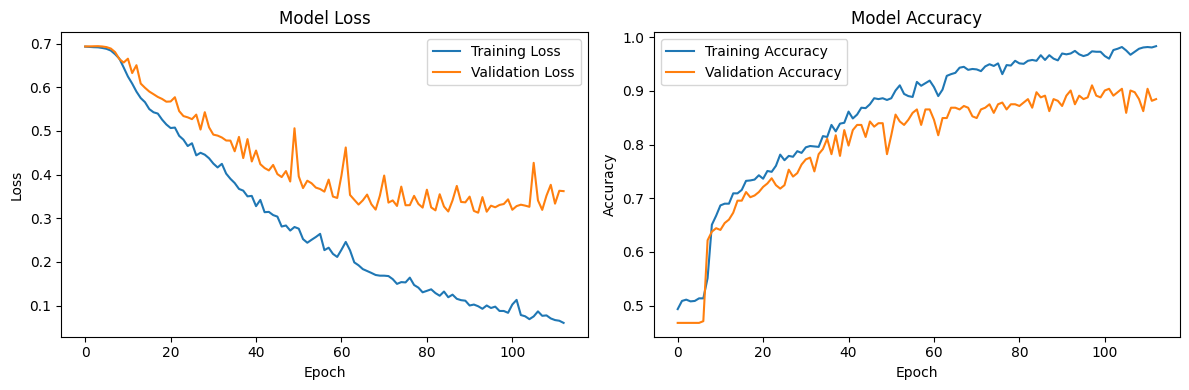

In [10]:
# Load the history object from the file
with open('/content/drive/MyDrive/image processing/history.pickle', 'rb') as file:
    history = pickle.load(file)

# Plot of model's loss and accuracy
plt.figure(figsize=(12, 4))

# Plot of training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot of training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


### Confusion matrix

In [11]:
# Predictions on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Performance metrics
loss, accuracy = model.evaluate(X_test, y_test)
precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

print("Confusion Matrix:")
print(cm)
print("\nLoss:", loss)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)


10/10 [==============================] - 0s 22ms/step - loss: 0.3174 - accuracy: 0.8974
Confusion Matrix:
[[147  19]
 [ 13 133]]

Loss: 0.31736159324645996
Accuracy: 0.8974359035491943
Precision: 0.875
Recall: 0.910958904109589
Specificity: 0.8855421686746988


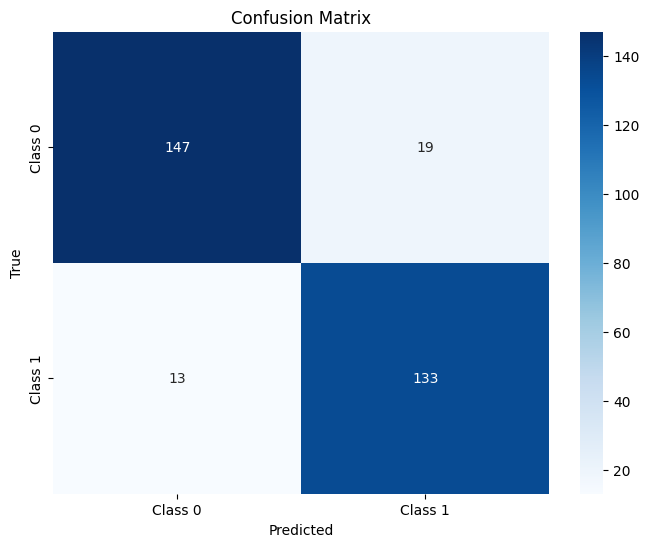

In [12]:
labels = ['Class 0', 'Class 1']

# Plot of confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Based on the confusion matrix and performance metrics, the accuracy of 0.8974 indicates that the model achieved a high overall correct prediction rate on the test dataset. The precision of 0.875 suggests that when the model predicts an instance as positive, there is an 87.5% chance that it is actually a true positive. This indicates a good ability of the model to minimize false positives. The recall of 0.911 implies that the model identified approximately 91.10% of the actual positive instances correctly. The specificity of 0.8855 indicates that the model correctly identified around 88.55% of the negative instances.

Overall, the model demonstrates strong performance, with high accuracy and balanced precision and recall values. It is effective in correctly classifying both positive and negative instances. The loss value also suggests a good fit of the model to the test data.

### Changing the network structure

I added another fully connected layer (Dense(500, activation='relu')) after the first fully connected layer. I also added a dropout layer (Dropout(0.5)) after the second fully connected layer. These changes increase the depth of the model and provide more capacity to learn complex patterns in the data.

In [4]:
model = Sequential()

# Common layer parameters
FS = (3, 3)  # Filter size
MP_size = (2, 2)  # Max-pooling size
NoF = 48  # Number of filters
P = 'same'  # Padding
activation = 'relu'  # Activation function

# Convolutional layers
layer_configs = [(2, 2, 2), (1, 1, 2), (5, 1, 1), (3, 1, 1), (3, 3, 1)]
for i, (s, strides, pooling) in enumerate(layer_configs, start=1):
    model.add(Conv2D(NoF, FS, strides=strides, padding=P, activation=activation, input_shape=(257, 257, 3)))
    if pooling:
        model.add(MaxPooling2D(pool_size=MP_size, strides=2))

# Flatten the tensor output
model.add(Flatten())

# Add a Fully Connected layer
model.add(Dense(1000, activation='relu'))
# Add a Dropout layer
model.add(Dropout(0.5))

# Add another Fully Connected layer
model.add(Dense(500, activation='relu'))
# Add another Dropout layer
model.add(Dropout(0.5))

# Add an output layer
model.add(Dense(2, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 129, 129, 48)      1344      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 48)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 48)        20784     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 48)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 48)        20784     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 48)       0

I only altered the batch size and set it to 200.

In [5]:
# Compile the model
learning_rate = 0.0001
loss_function = BinaryCrossentropy()
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train the model with early stopping
batch_size = 200
epochs = 500
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test), callbacks=[early_stopping])

test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

with open('/content/drive/MyDrive/image processing/history_modified.pickle', 'wb') as file:
    pickle.dump(history.history, file)


Epoch 1/500
7/7 [==============================] - 19s 517ms/step - loss: 0.6933 - accuracy: 0.4848 - val_loss: 0.6938 - val_accuracy: 0.4679
Epoch 2/500
7/7 [==============================] - 1s 173ms/step - loss: 0.6918 - accuracy: 0.5032 - val_loss: 0.6937 - val_accuracy: 0.4679
Epoch 3/500
7/7 [==============================] - 1s 178ms/step - loss: 0.6927 - accuracy: 0.5096 - val_loss: 0.6941 - val_accuracy: 0.4679
Epoch 4/500
7/7 [==============================] - 1s 186ms/step - loss: 0.6915 - accuracy: 0.5136 - val_loss: 0.6940 - val_accuracy: 0.4679
Epoch 5/500
7/7 [==============================] - 1s 175ms/step - loss: 0.6906 - accuracy: 0.5072 - val_loss: 0.6951 - val_accuracy: 0.4679
Epoch 6/500
7/7 [==============================] - 2s 222ms/step - loss: 0.6907 - accuracy: 0.5080 - val_loss: 0.6966 - val_accuracy: 0.4679
Epoch 7/500
7/7 [==============================] - 2s 231ms/step - loss: 0.6904 - accuracy: 0.5080 - val_loss: 0.6945 - val_accuracy: 0.4679
Epoch 8/500


As you see the accuracy on the train set is lower than before but the accuracy on the test set dropped more significantly meaning that adding more depth to our model has caused over fitting instead of improvement.

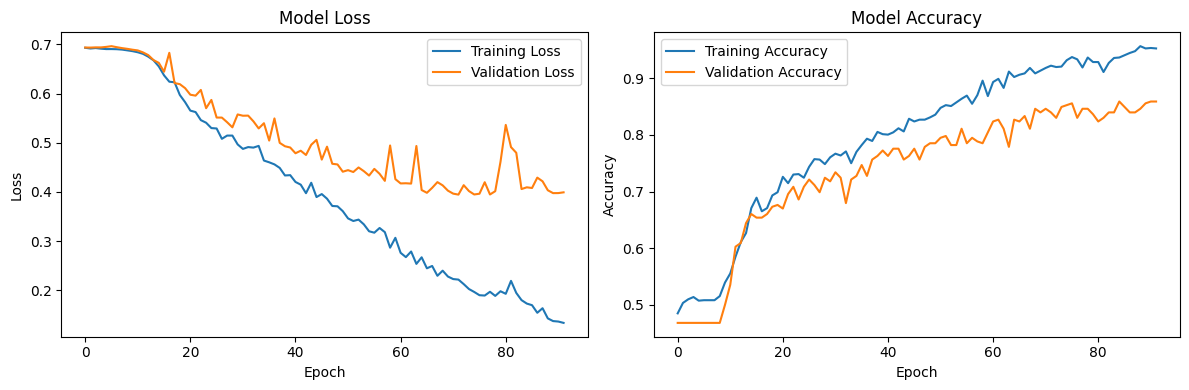

In [6]:
with open('/content/drive/MyDrive/image processing/history_modified.pickle', 'rb') as file:
    history = pickle.load(file)

# Plot the model's loss and accuracy
plt.figure(figsize=(12, 4))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


The occurrence of overfitting is observed in these plots, as the validation loss ceases to decrease while the train loss continues to decrease steadily.

In [9]:
# Predictions on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Performance metrics
loss, accuracy = model.evaluate(X_test, y_test)
precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

print("Confusion Matrix:")
print(cm)
print("\nLoss:", loss)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)


10/10 [==============================] - 0s 22ms/step - loss: 0.3945 - accuracy: 0.8397
Confusion Matrix:
[[138  28]
 [ 22 124]]

Loss: 0.3945079743862152
Accuracy: 0.8397436141967773
Precision: 0.8157894736842105
Recall: 0.8493150684931506
Specificity: 0.8313253012048193


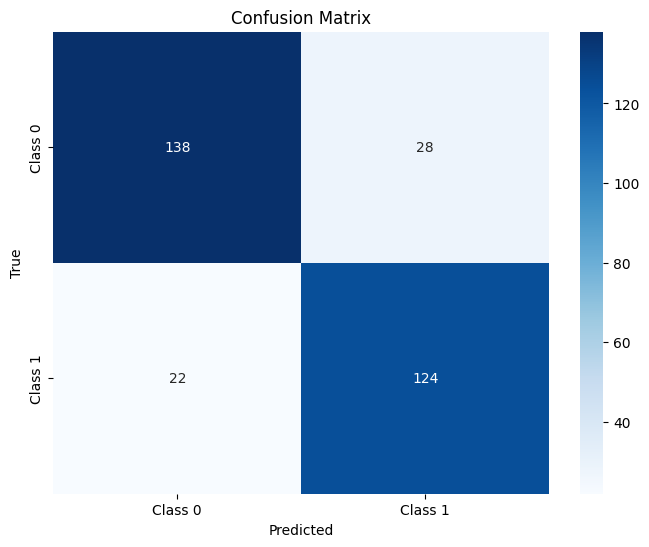

In [10]:

# Define the labels for the confusion matrix
labels = ['Class 0', 'Class 1']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Compared to the confusion matrix of the given model:

1. Accuracy: The second confusion matrix has a lower accuracy of 0.8397 compared to the first matrix's accuracy of 0.8974.

2. Precision: The precision in the second matrix is 0.8158, while the precision in the first matrix is 0.875. The given model achieved a higher precision, indicating that it had a better ability to minimize false positive predictions.

3. Recall: The recall in the second matrix is 0.8493, while the recall in the first matrix is 0.911. The first model had a higher recall, indicating that it correctly identified a greater proportion of the actual positive instances.

4. Specificity: The specificity in the second matrix is 0.8313, while the specificity in the first matrix is 0.8855.

Overall, the given model, represented by the first confusion matrix, performed better than the second model. It achieved higher accuracy, precision, recall and specificity. This indicates that the first model had a beeter performance in correctly classifying instances and avoiding false predictions compared to the second model.